In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv("student_dataset.csv")
df

Student_ID  Age  Gender  Hours_Studied  Attendance_Rate  \
0            1   24  Female            3.6             55.1   
1            2   21  Female            6.2             83.2   
2            3   22    Male            2.2             50.3   
3            4   24  Female            1.1             58.0   
4            5   20    Male            2.7             77.4   
..         ...  ...     ...            ...              ...   
95          96   23  Female            1.1             76.6   
96          97   21  Female            1.7             77.0   
97          98   23    Male            7.2             81.9   
98          99   24    Male            5.0             86.3   
99         100   24    Male            0.6             98.8   

    Previous_Sem_CGPA  Family_Income Part_Time_Job  Final_Score  
0                7.58          67280           Yes         94.2  
1                6.61          99459            No         88.5  
2                8.98          36779            No         96.7  
3                6.35          83932            No         82.2  
4                7.19          92936            No         74.9  
..                ...            ...           ...          ...  
95               9.51         113714           Yes         53.1  
96               7.53         114246            No         46.5  
97               9.13          35485            No         40.8  
98               6.60          64482           Yes         42.8  
99               9.48         106188           Yes         65.0  

[100 rows x 9 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Student_ID         100 non-null    int64  
 1   Age                100 non-null    int64  
 2   Gender             100 non-null    object 
 3   Hours_Studied      100 non-null    float64
 4   Attendance_Rate    100 non-null    float64
 5   Previous_Sem_CGPA  100 non-null    float64
 6   Family_Income      100 non-null    int64  
 7   Part_Time_Job      100 non-null    object 
 8   Final_Score        100 non-null    float64
dtypes: float64(4), int64(3), object(2)
memory usage: 7.2+ KB


In [4]:
df.describe()

Student_ID         Age  Hours_Studied  Attendance_Rate  \
count  100.000000  100.000000     100.000000        100.00000   
mean    50.500000   21.210000       4.214000         76.41500   
std     29.011492    1.913773       2.224293         14.43588   
min      1.000000   18.000000       0.600000         50.30000   
25%     25.750000   19.750000       2.300000         64.60000   
50%     50.500000   21.000000       4.300000         78.10000   
75%     75.250000   23.000000       6.225000         87.60000   
max    100.000000   24.000000       7.900000         99.50000   

       Previous_Sem_CGPA  Family_Income  Final_Score  
count         100.000000     100.000000   100.000000  
mean            7.459900   81902.370000    67.907000  
std             1.477141   35735.329886    19.655468  
min             5.070000   21062.000000    35.900000  
25%             6.247500   48019.250000    49.625000  
50%             7.490000   81888.500000    67.000000  
75%             8.750000  109449.250000    86.350000  
max             9.950000  146174.000000   100.000000

In [5]:
df.isnull().sum()

Student_ID           0
Age                  0
Gender               0
Hours_Studied        0
Attendance_Rate      0
Previous_Sem_CGPA    0
Family_Income        0
Part_Time_Job        0
Final_Score          0
dtype: int64

array([[<Axes: title={'center': 'Student_ID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Hours_Studied'}>],
       [<Axes: title={'center': 'Attendance_Rate'}>,
        <Axes: title={'center': 'Previous_Sem_CGPA'}>,
        <Axes: title={'center': 'Family_Income'}>],
       [<Axes: title={'center': 'Final_Score'}>, <Axes: >, <Axes: >]],
      dtype=object)

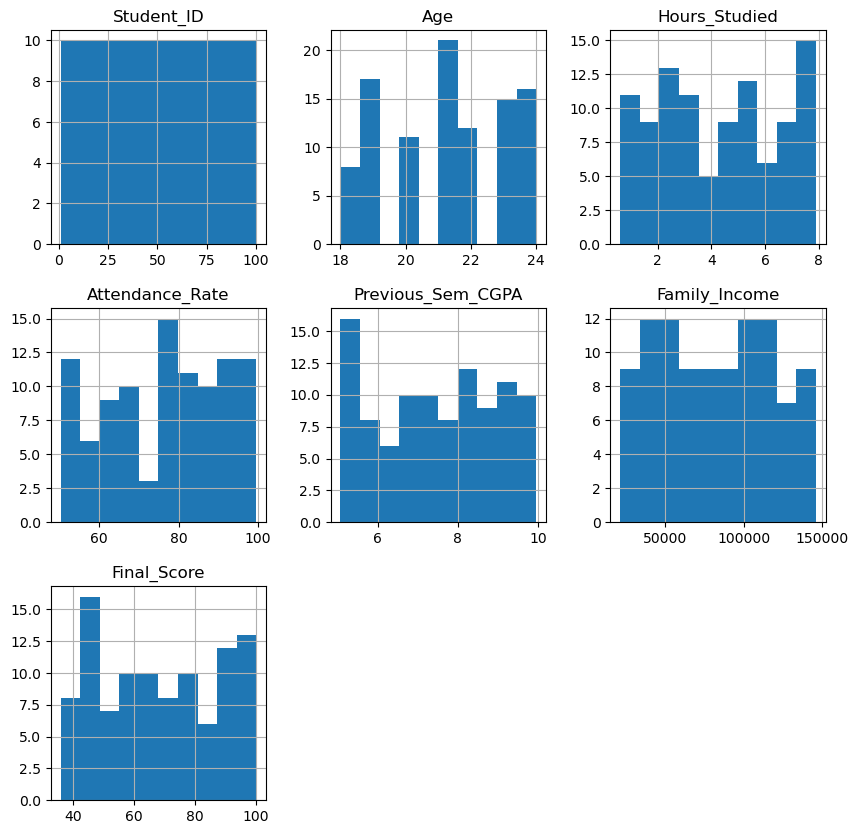

In [6]:
df.hist(figsize=(10,10))

In [7]:
df["Part_Time_Job"] = df["Part_Time_Job"].map({"Yes": 1, "No": 0})
df

Student_ID  Age  Gender  Hours_Studied  Attendance_Rate  \
0            1   24  Female            3.6             55.1   
1            2   21  Female            6.2             83.2   
2            3   22    Male            2.2             50.3   
3            4   24  Female            1.1             58.0   
4            5   20    Male            2.7             77.4   
..         ...  ...     ...            ...              ...   
95          96   23  Female            1.1             76.6   
96          97   21  Female            1.7             77.0   
97          98   23    Male            7.2             81.9   
98          99   24    Male            5.0             86.3   
99         100   24    Male            0.6             98.8   

    Previous_Sem_CGPA  Family_Income  Part_Time_Job  Final_Score  
0                7.58          67280              1         94.2  
1                6.61          99459              0         88.5  
2                8.98          36779              0         96.7  
3                6.35          83932              0         82.2  
4                7.19          92936              0         74.9  
..                ...            ...            ...          ...  
95               9.51         113714              1         53.1  
96               7.53         114246              0         46.5  
97               9.13          35485              0         40.8  
98               6.60          64482              1         42.8  
99               9.48         106188              1         65.0  

[100 rows x 9 columns]

In [8]:
feature_df=df[["Age", "Hours_Studied", "Attendance_Rate","Part_Time_Job","Previous_Sem_CGPA"]]
target_df=df["Family_Income"]
print(feature_df)

    Age  Hours_Studied  Attendance_Rate  Part_Time_Job  Previous_Sem_CGPA
0    24            3.6             55.1              1               7.58
1    21            6.2             83.2              0               6.61
2    22            2.2             50.3              0               8.98
3    24            1.1             58.0              0               6.35
4    20            2.7             77.4              0               7.19
..  ...            ...              ...            ...                ...
95   23            1.1             76.6              1               9.51
96   21            1.7             77.0              0               7.53
97   23            7.2             81.9              0               9.13
98   24            5.0             86.3              1               6.60
99   24            0.6             98.8              1               9.48

[100 rows x 5 columns]


In [9]:
X=feature_df

In [10]:
x_train,x_test,y_train,y_test=train_test_split(feature_df,target_df,test_size=0.2,random_state=42)

In [11]:
print(x_test.values)

[[23.    2.3  79.5   1.    9.03]
 [22.    6.   54.9   1.    7.88]
 [21.    5.7  89.9   0.    9.22]
 [21.    2.3  69.3   1.    9.28]
 [20.    7.3  64.7   0.    7.52]
 [24.    0.8  96.4   0.    8.08]
 [19.    0.6  94.6   0.    7.1 ]
 [21.    6.6  73.3   0.    6.41]
 [24.    6.5  66.3   1.    7.04]
 [24.    3.6  55.1   1.    7.58]
 [19.    2.2  63.3   1.    9.77]
 [21.    4.4  64.    0.    9.28]
 [22.    1.5  89.8   0.    6.41]
 [20.    7.8  58.9   1.    5.49]
 [19.    5.9  88.5   1.    9.29]
 [20.    2.7  77.4   0.    7.19]
 [23.    7.4  68.8   0.    8.14]
 [18.    7.1  54.7   0.    9.39]
 [20.    7.2  82.5   1.    5.78]
 [18.    5.8  51.2   1.    8.52]]


In [12]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [13]:
importances = pd.Series(model.coef_, index=list(X.columns)).sort_values()

In [14]:
y_pred = model.predict(x_test)
print(y_pred)

[84636.48807127 85014.4473103  63439.7424155  91250.15373303
 70834.15822591 71871.2127839  82597.24366812 69455.10482748
 77137.82921088 88990.91553771 96466.07198762 76095.93809669
 77227.1642281  84249.6851989  77384.765554   80471.75865699
 63389.70782669 76242.87633563 77638.52955357 92967.55841301]


In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1310321749.1773686
R-squared: -0.28698733528951226


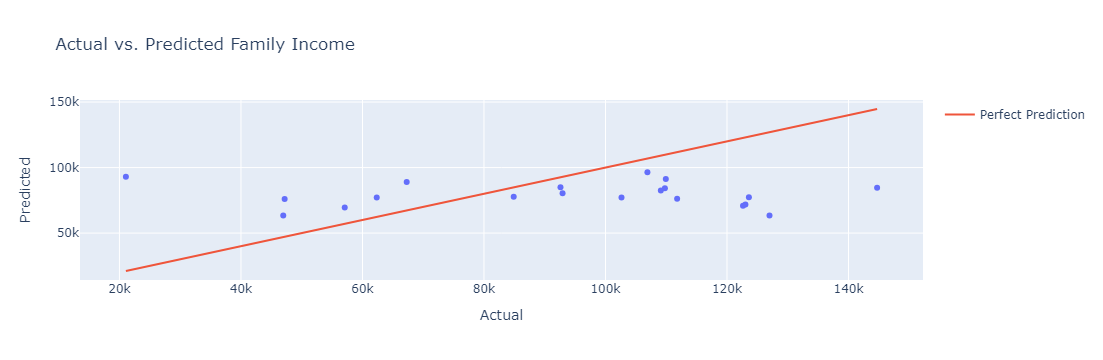

In [16]:
import plotly.express as px
test_results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
fig = px.scatter(test_results, x='Actual', y='Predicted', title='Actual vs. Predicted Family Income')
fig.add_scatter(x=test_results['Actual'], y=test_results['Actual'], mode='lines', name='Perfect Prediction')

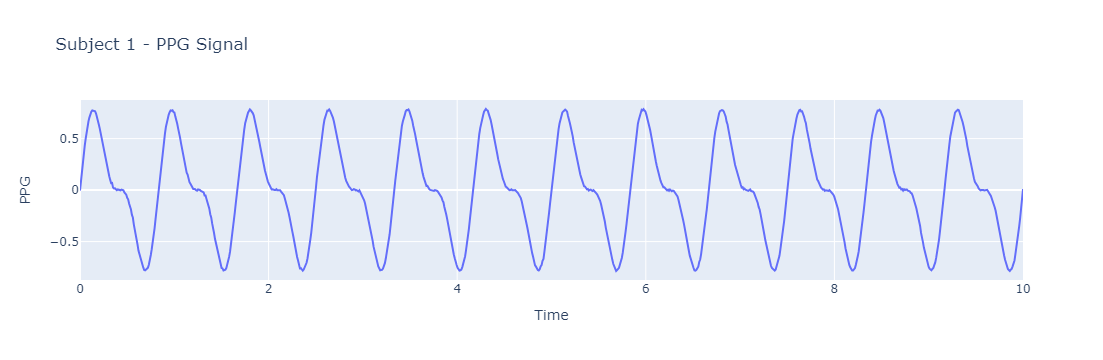

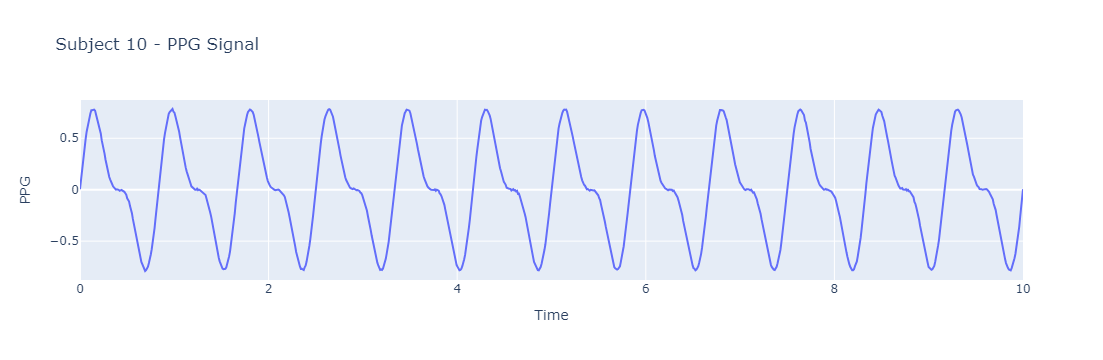

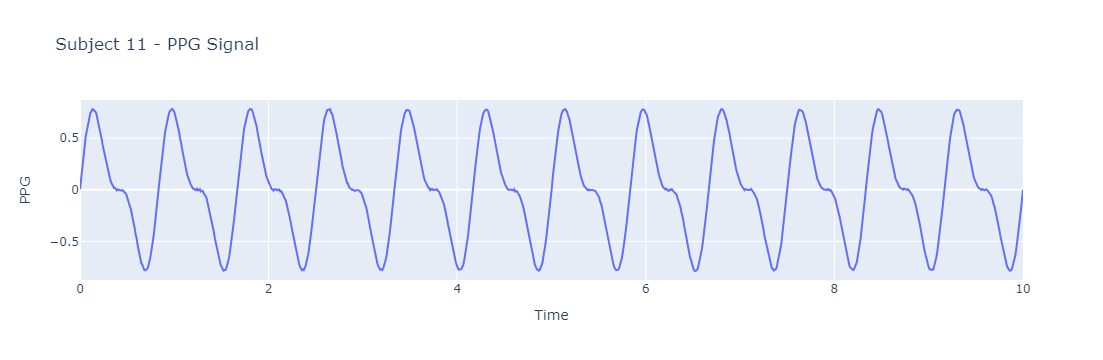

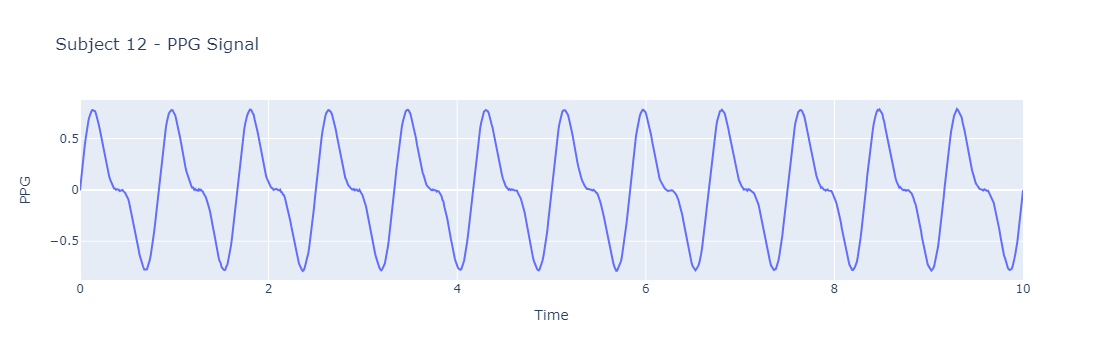

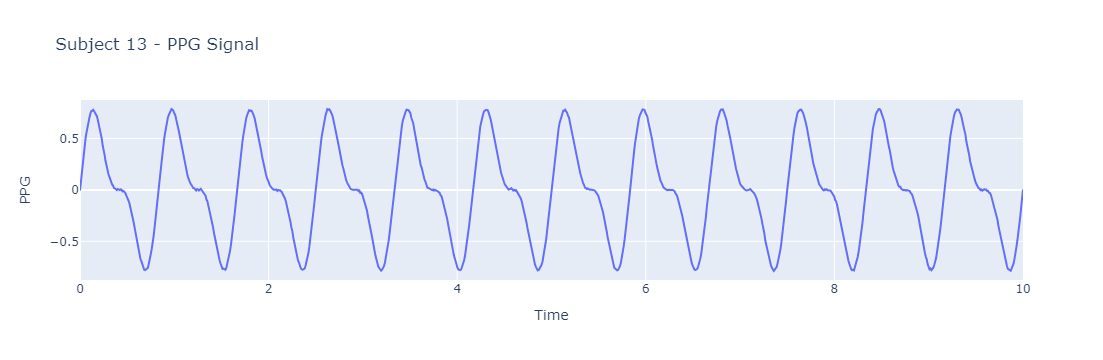

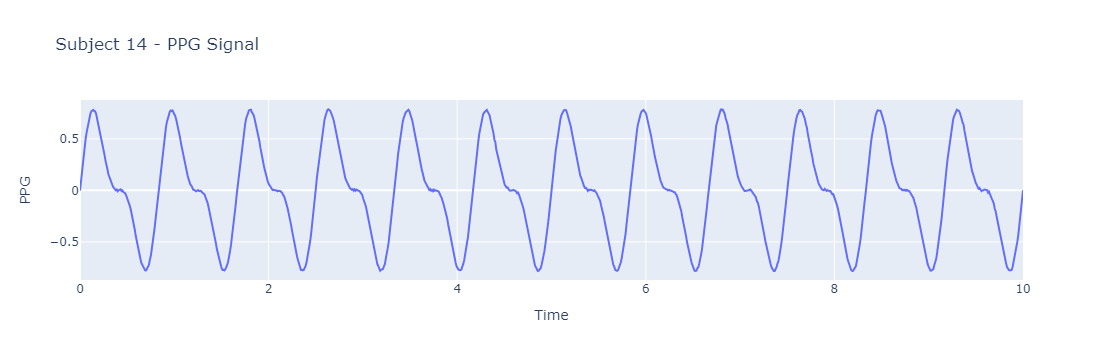

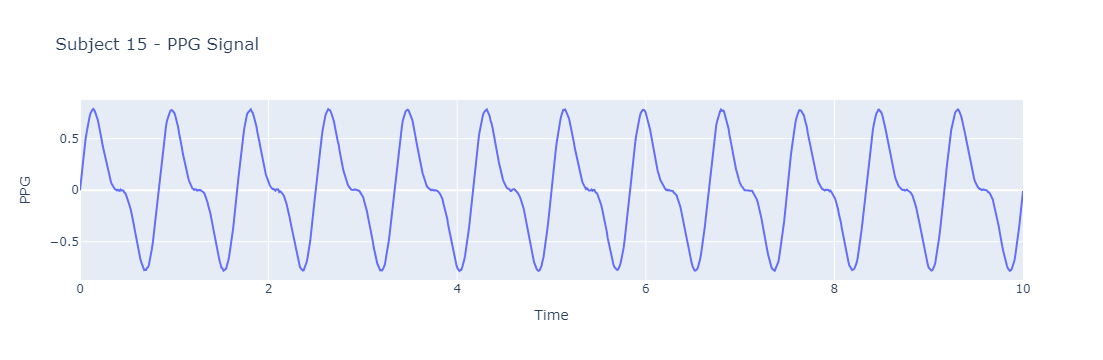

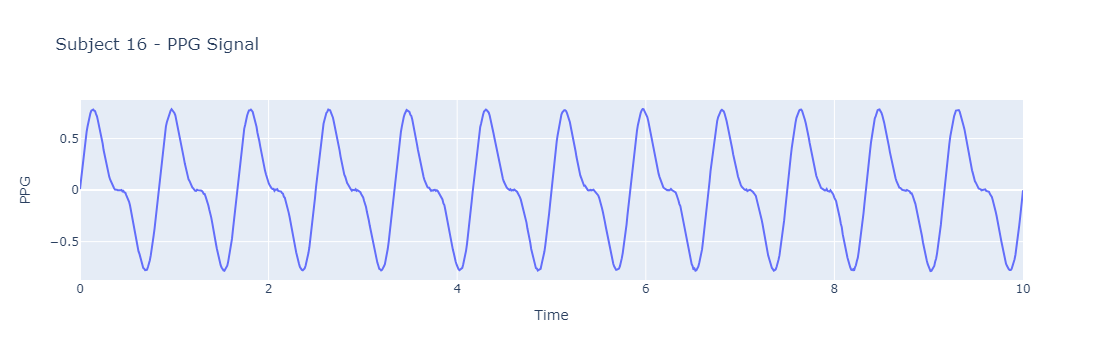

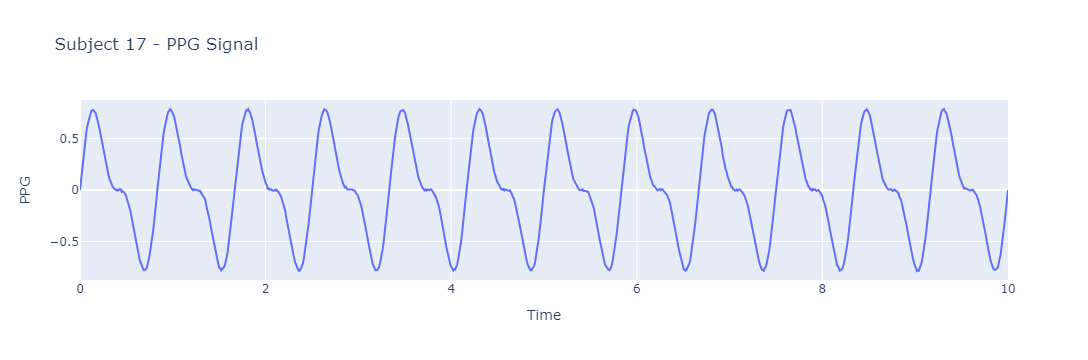

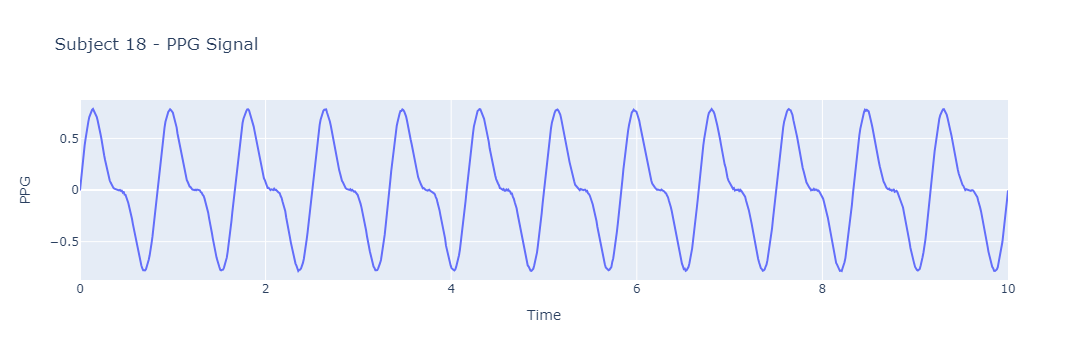

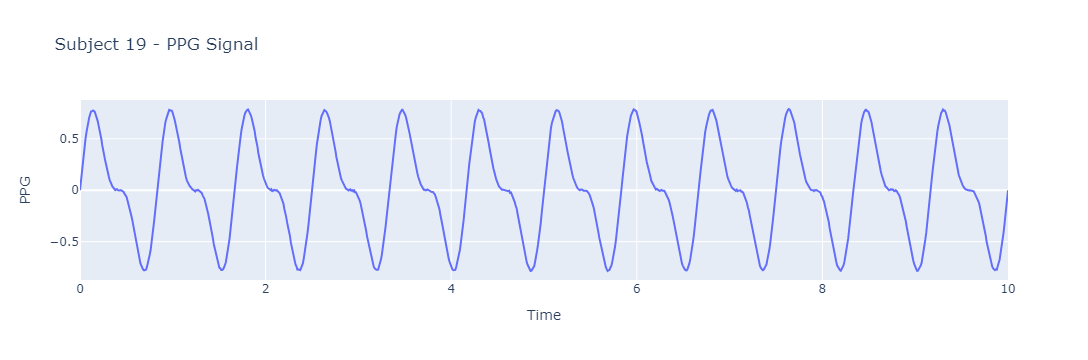

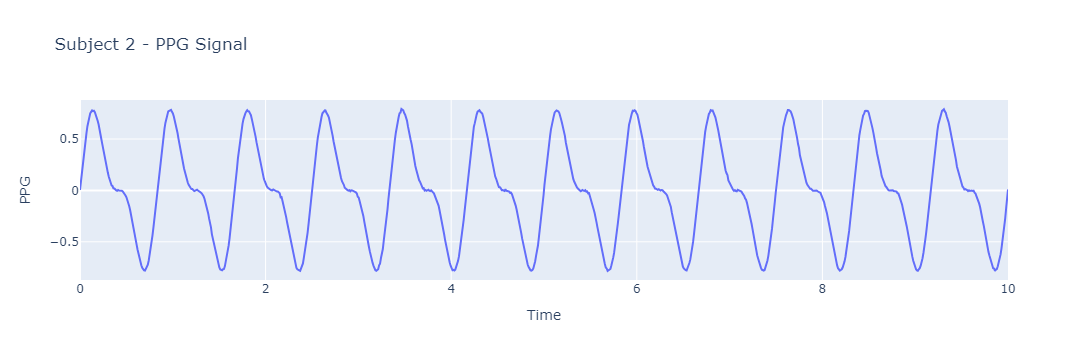

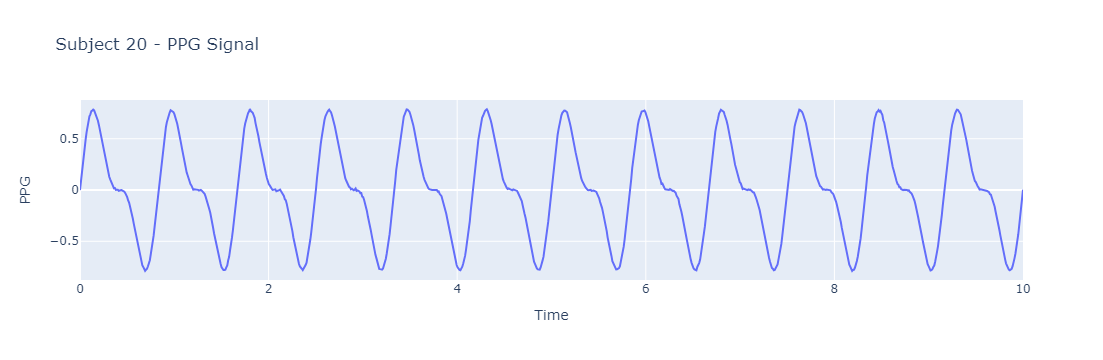

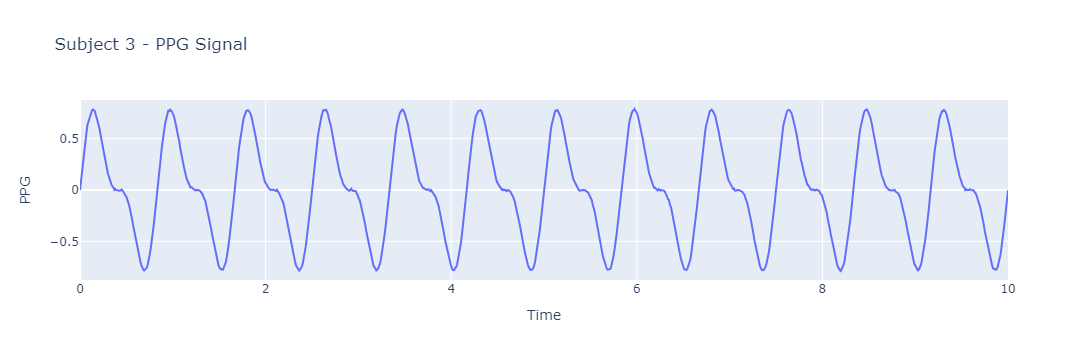

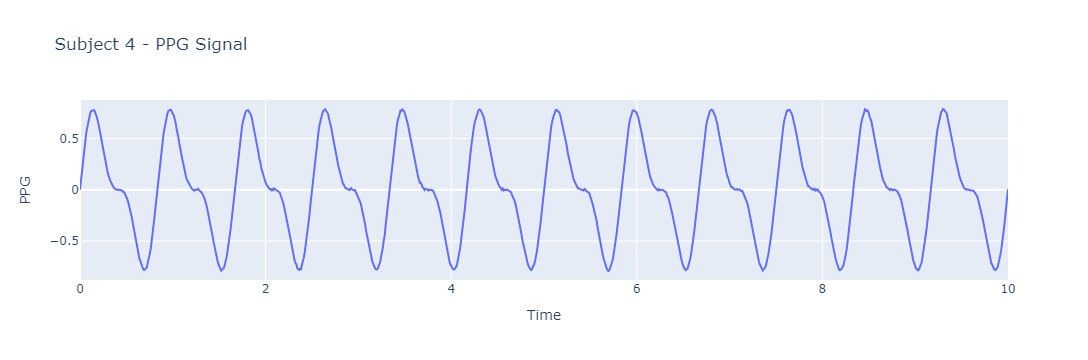

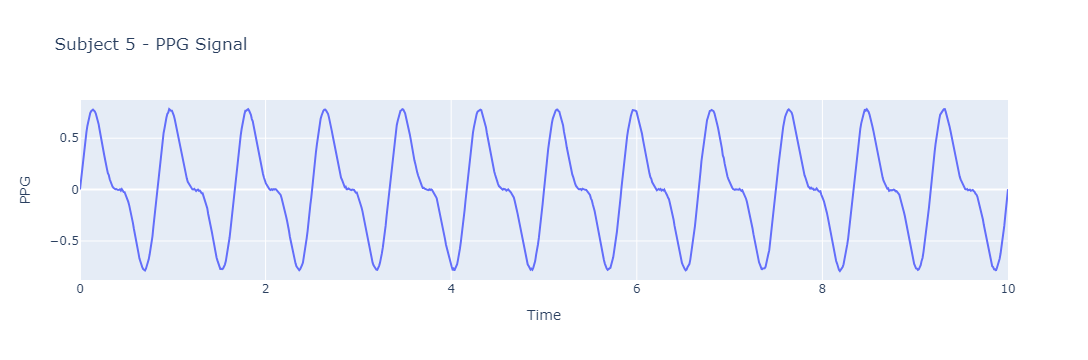

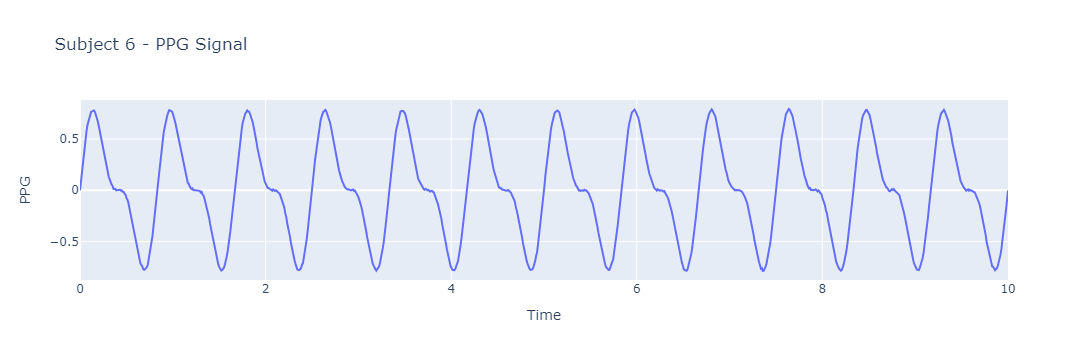

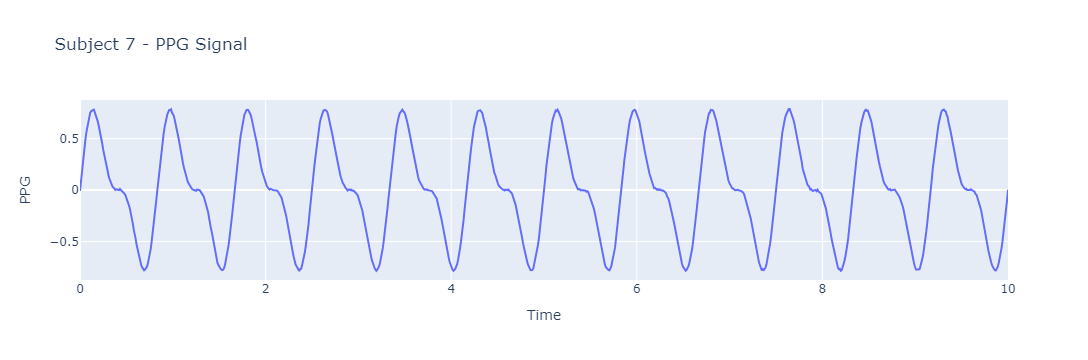

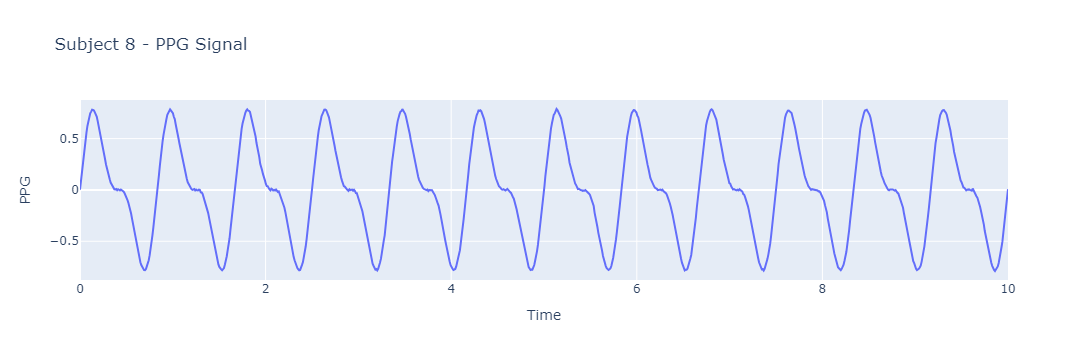

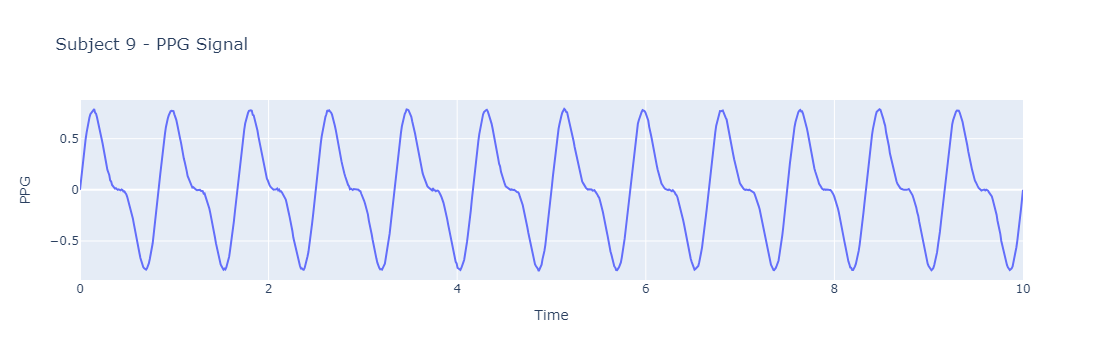

In [62]:
import pandas as pd
import plotly.express as px
import glob

folder_path = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects/'
file_list = glob.glob(folder_path + "*.csv")

# Loop through each file and plot
for file_path in file_list:
    df = pd.read_csv(file_path)
    subject_id = df['Subject_ID'].iloc[0]

    # Plot with Plotly
    fig = px.line(df, x='Time', y='PPG', title=f'Subject {subject_id} - PPG Signal')
    fig.show()

In [68]:
import pandas as pd
import glob
import os

# Paths
folder_path = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects/'
output_path = 'C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/'
os.makedirs(output_path, exist_ok=True)  # Create output folder if not exists

file_list = glob.glob(folder_path + "*.csv")

# Load HR & HRV data
hr_data = pd.read_csv('C:/Users/Asus/Desktop/iiitnr/master_dataset.csv')

# Loop through each file, add HR & HRV, and save new CSV
for file_path in file_list:
    df = pd.read_csv(file_path)
    subject_id = df['Subject_ID'].iloc[0]

    # Get HR and HRV for this subject
    hr_row = hr_data[hr_data['Subject_ID'] == subject_id]
    
    if not hr_row.empty:
        hr = hr_row['HR'].values[0]
        hrv = hr_row['HRV'].values[0]

        # Add HR & HRV columns
        df['HR'] = hr
        df['HRV'] = hrv

        # Save to new CSV
        file_name = os.path.basename(file_path)
        new_file_path = os.path.join(output_path, file_name.replace('.csv', '_updated.csv'))
        df.to_csv(new_file_path, index=False)
        print(f"Saved: {new_file_path}")
    else:
        print(f"No HR/HRV data for Subject {subject_id}, skipped.")


Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_1_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_10_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_11_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_12_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_13_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_14_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_15_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_16_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_17_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_18_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_19_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Subjects_Updated/subject_2_updated.csv
Saved: C:/Users/Asus/Desktop/iiitnr/PPG_Su

In [ ]:
minimum 4 model